**Vamos experimentar agora o algoritmo Decision Tree?**

In [25]:
!pip -q install yellowbrick


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

In [27]:
import pickle
with open('restaurante.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

**Importando a biblioteca de ajuste de hiperparâmetros**

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
}

modelo = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

In [30]:
modelo.fit(X_treino, y_treino)
print(modelo.best_params_)
print(modelo.best_score_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


c:\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'gini', 'max_depth': 2, 'max_features': 0.4}
0.9


**Agora precisamos rodar a árvore com os hiperparâmetros obtidos**

In [31]:
modelo= DecisionTreeClassifier(max_depth=4, criterion='entropy', max_features=0.6)
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.6)



> **Vamos testar o modelo?**



In [32]:

previsoes = modelo.predict(X_teste)

In [33]:
previsoes

array(['Sim', 'Nao', 'Nao'], dtype=object)



> **Será se o modelo acertou?**



In [34]:
y_teste

array(['Nao', 'Sim', 'Nao'], dtype=object)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.3333333333333333

In [36]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[1, 1],
       [1, 0]], dtype=int64)

0.3333333333333333

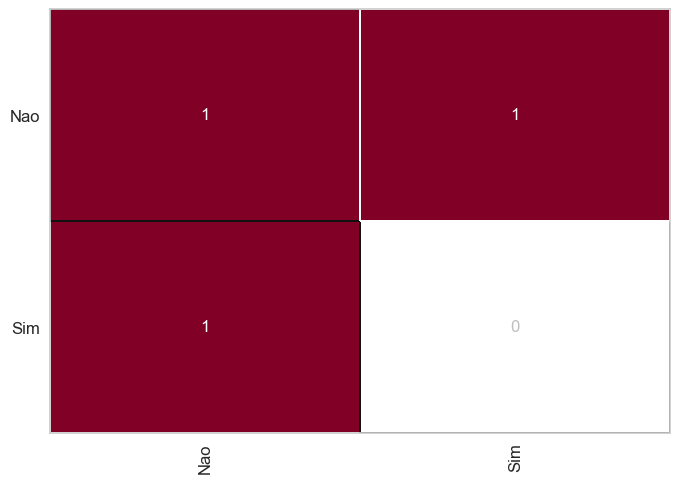

In [37]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [38]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         Nao       0.50      0.50      0.50         2
         Sim       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



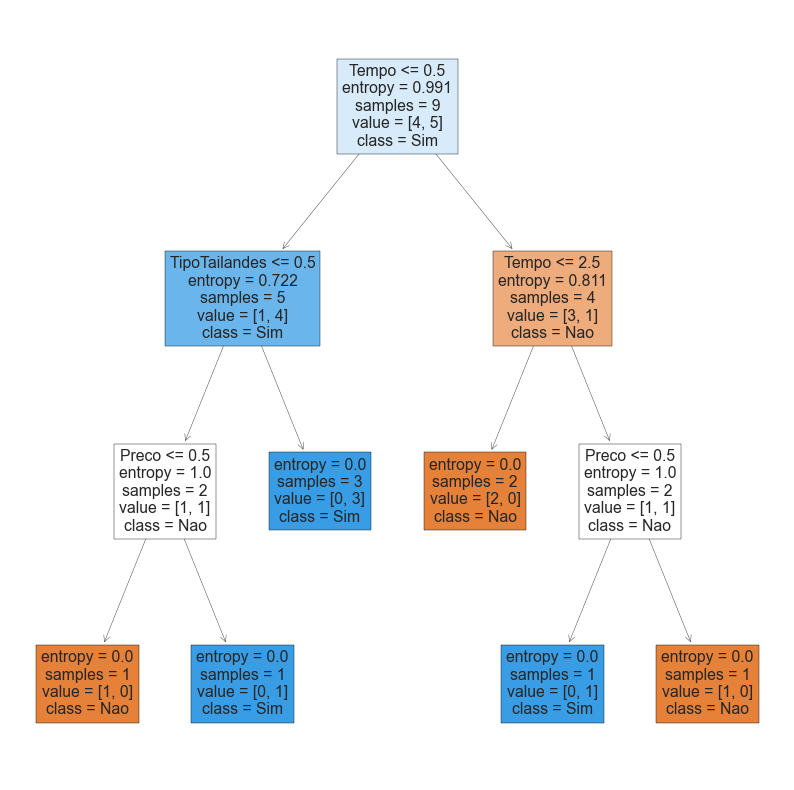

In [39]:
from sklearn import tree
previsores = ['Alternativo', 'Bar', 'Sex/Sab', 'Fome', 'Cliente', 'Preco', 'Chuva', 'Res', 
              'TipoFrances', 'TipoTailandes', 'TipoHamburger', 'TipoItaliano', 
              'Tempo']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(modelo, feature_names=previsores, class_names = modelo.classes_, filled=True);